In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import LabelBinarizer
import scipy.stats as stats
from sklearn import linear_model
from scipy.stats import ttest_rel

january_flight_data = pd.read_csv("January Flight Data.csv")
january_flight_data.head()

,Flight Date,Airline,ORIGIN,Destination,Departure Time,CRS Departure Time,Taxi Out,Departure Delay,Air Time,Distance,Cancelled,Tail Number,ICAO Type,Manufacture Year,Temperature,Cloud Cover,Active Weather,Flight Year,Flight Month,Flight Day
0,01-01-2022,American Airlines,JFK,LAX,01-01-2022 06:57,01-01-2022 07:00,19,-3,347,2475,0,N106NN,A321,2014,9.39,4,0,2022,1,1
1,01-01-2022,American Airlines,LAX,JFK,01-01-2022 08:57,01-01-2022 09:00,20,-3,270,2475,0,N101NN,A321,2013,12.22,2,0,2022,1,1
2,01-01-2022,American Airlines,ORD,FLL,01-01-2022 09:37,01-01-2022 18:30,23,907,166,1182,0,N805NN,B738,2009,2.22,4,1,2022,1,1
3,01-01-2022,American Airlines,CLT,STL,01-01-2022 23:00,01-01-2022 22:40,16,20,104,575,0,N870NN,B738,2011,20.00,3,0,2022,1,1
4,01-01-2022,American Airlines,ATL,DFW,01-01-2022 16:24,01-01-2022 16:29,30,-5,114,731,0,N561UW,A321,2012,21.72,4,1,2022,1,1


In [5]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [6]:
january_flight_data_df = january_flight_data[['Flight Date','Flight Day', 'Flight Month', 'Flight Year', 'Airline','ORIGIN','Destination','Departure Time','CRS Departure Time',
        'Taxi Out', 'Departure Delay', 'Air Time', 'Distance','Cancelled', 'Tail Number','ICAO Type','Manufacture Year','Temperature',
        'Cloud Cover','Active Weather']]
january_flight_data_df.head()

,Flight Date,Flight Day,Flight Month,Flight Year,Airline,ORIGIN,Destination,Departure Time,CRS Departure Time,Taxi Out,Departure Delay,Air Time,Distance,Cancelled,Tail Number,ICAO Type,Manufacture Year,Temperature,Cloud Cover,Active Weather
0,01-01-2022,1,1,2022,American Airlines,JFK,LAX,01-01-2022 06:57,01-01-2022 07:00,19,-3,347,2475,0,N106NN,A321,2014,9.39,4,0
1,01-01-2022,1,1,2022,American Airlines,LAX,JFK,01-01-2022 08:57,01-01-2022 09:00,20,-3,270,2475,0,N101NN,A321,2013,12.22,2,0
2,01-01-2022,1,1,2022,American Airlines,ORD,FLL,01-01-2022 09:37,01-01-2022 18:30,23,907,166,1182,0,N805NN,B738,2009,2.22,4,1
3,01-01-2022,1,1,2022,American Airlines,CLT,STL,01-01-2022 23:00,01-01-2022 22:40,16,20,104,575,0,N870NN,B738,2011,20.00,3,0
4,01-01-2022,1,1,2022,American Airlines,ATL,DFW,01-01-2022 16:24,01-01-2022 16:29,30,-5,114,731,0,N561UW,A321,2012,21.72,4,1


In [7]:
january_flight_data.describe()

,Taxi Out,Departure Delay,Air Time,Distance,Cancelled,Manufacture Year,Temperature,Cloud Cover,Active Weather,Flight Year,Flight Month,Flight Day
count,436603.000000,436603.000000,436603.000000,436603.000000,436603.000000,436603.000000,436603.000000,436603.000000,436603.000000,436603.0,436603.0,436603.000000
mean,17.149376,10.463240,113.108806,850.654643,0.069182,2009.463897,4.993400,2.145961,0.136369,2022.0,1.0,16.080616
std,10.539358,47.785129,74.722701,605.407442,0.344963,7.357847,9.753268,1.506643,0.355177,0.0,0.0,8.931706
min,0.000000,-55.000000,0.000000,66.000000,0.000000,1990.000000,-27.220000,0.000000,0.000000,2022.0,1.0,1.000000
25%,12.000000,-6.000000,60.000000,404.000000,0.000000,2003.000000,-1.720000,1.000000,0.000000,2022.0,1.0,8.000000
50%,15.000000,-2.000000,98.000000,717.000000,0.000000,2010.000000,4.390000,2.000000,0.000000,2022.0,1.0,16.000000
75%,20.000000,7.000000,146.000000,1089.000000,0.000000,2016.000000,11.720000,4.000000,0.000000,2022.0,1.0,24.000000
max,186.000000,2501.000000,727.000000,5095.000000,3.000000,2022.000000,31.720000,4.000000,2.000000,2022.0,1.0,31.000000


In [8]:
y = LabelBinarizer().fit_transform(january_flight_data_df["Active Weather"])

In [9]:
active_weather = pd.DataFrame(y,columns = ["No Weather","Moderate Weather", "Severe Weather"])

In [10]:
df = pd.concat([january_flight_data_df, active_weather],axis = 1, join = "inner")
df.head()

,Flight Date,Flight Day,Flight Month,Flight Year,Airline,ORIGIN,Destination,Departure Time,CRS Departure Time,Taxi Out,...,Cancelled,Tail Number,ICAO Type,Manufacture Year,Temperature,Cloud Cover,Active Weather,No Weather,Moderate Weather,Severe Weather
0,01-01-2022,1,1,2022,American Airlines,JFK,LAX,01-01-2022 06:57,01-01-2022 07:00,19,...,0,N106NN,A321,2014,9.39,4,0,1,0,0
1,01-01-2022,1,1,2022,American Airlines,LAX,JFK,01-01-2022 08:57,01-01-2022 09:00,20,...,0,N101NN,A321,2013,12.22,2,0,1,0,0
2,01-01-2022,1,1,2022,American Airlines,ORD,FLL,01-01-2022 09:37,01-01-2022 18:30,23,...,0,N805NN,B738,2009,2.22,4,1,0,1,0
3,01-01-2022,1,1,2022,American Airlines,CLT,STL,01-01-2022 23:00,01-01-2022 22:40,16,...,0,N870NN,B738,2011,20.00,3,0,1,0,0
4,01-01-2022,1,1,2022,American Airlines,ATL,DFW,01-01-2022 16:24,01-01-2022 16:29,30,...,0,N561UW,A321,2012,21.72,4,1,0,1,0


# Explanation

With our data frame create, we run a groupby, grouping by Airports, so that we can see the how each airport's details. We need to then build out the measures to view and combine them into a dataframe to run our tests.

In [11]:
origin_caused_delay = df.groupby("ORIGIN")

In [12]:
origin_delay = origin_caused_delay['ORIGIN','Air Time','Distance','Departure Delay','Cloud Cover']

c:\Users\Pinal\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [13]:
origin_delay = origin_delay.mean()

In [14]:
no_active_weather = df[(df['No Weather'] == 1)].groupby('ORIGIN')['No Weather'].sum()

In [15]:
moderate_active_weather = df[(df['Moderate Weather'] == 1)].groupby('ORIGIN')['Moderate Weather'].sum()

In [16]:
severe_active_weather = df[(df['Severe Weather'] == 1)].groupby('ORIGIN')['Severe Weather'].sum()

In [17]:
flight_count = origin_caused_delay['ORIGIN'].count()

In [18]:
origin_delay['Total Flights in January'] = flight_count

In [19]:
origin_delay["Flights per Day"] = origin_delay["Total Flights in January"]/31

In [20]:
origin_delay['No Active Weather'] = no_active_weather

In [21]:
origin_delay['Moderate Weather'] = moderate_active_weather

In [22]:
origin_delay['Severe Weather'] = severe_active_weather

In [23]:
origin_delay["Total Taxi Out Time"] = origin_caused_delay["Taxi Out"].sum()
origin_delay["Taxi Time Per Flight"] = origin_delay["Total Taxi Out Time"] / origin_delay["Total Flights in January"] 

In [24]:
origin_delays = origin_delay.fillna(0).sort_values(by = "Departure Delay", ascending = False)

In [25]:
origin_delays

,Air Time,Distance,Departure Delay,Cloud Cover,Total Flights in January,Flights per Day,No Active Weather,Moderate Weather,Severe Weather,Total Taxi Out Time,Taxi Time Per Flight
ORIGIN,,,,,,,,,,,
EYW,108.944444,823.380051,30.441919,1.554293,792,25.548387,768,23.0,1.0,10755,13.579545
JAC,101.800388,796.160853,28.740310,1.531008,516,16.645161,360,153.0,3.0,12145,23.536822
STT,184.649194,1369.695565,26.129032,1.237903,496,16.000000,492,4.0,0.0,7238,14.592742
DEN,105.947547,851.465588,18.921105,2.074742,20952,675.870968,17708,2863.0,381.0,378472,18.063765
ROC,63.766384,398.164996,17.696993,3.296068,1297,41.838710,700,591.0,6.0,26274,20.257517
...,...,...,...,...,...,...,...,...,...,...,...
ILM,63.029979,385.706638,4.224839,1.197002,467,15.064516,429,30.0,8.0,6840,14.646681
SNA,102.131652,774.191242,4.065965,1.172672,3608,116.387097,3245,363.0,0.0,45266,12.546009
SAN,131.272547,1061.605221,4.050945,1.743654,5555,179.193548,5099,456.0,0.0,82334,14.821602


In [26]:
delay_flight = df[(df['Departure Delay'] > 0 ) ]
delay_flight

,Flight Date,Flight Day,Flight Month,Flight Year,Airline,ORIGIN,Destination,Departure Time,CRS Departure Time,Taxi Out,...,Cancelled,Tail Number,ICAO Type,Manufacture Year,Temperature,Cloud Cover,Active Weather,No Weather,Moderate Weather,Severe Weather
2,01-01-2022,1,1,2022,American Airlines,ORD,FLL,01-01-2022 09:37,01-01-2022 18:30,23,...,0,N805NN,B738,2009,2.22,4,1,0,1,0
3,01-01-2022,1,1,2022,American Airlines,CLT,STL,01-01-2022 23:00,01-01-2022 22:40,16,...,0,N870NN,B738,2011,20.00,3,0,1,0,0
9,01-01-2022,1,1,2022,American Airlines,AUS,LAS,01-01-2022 22:07,01-01-2022 21:18,14,...,0,N929AA,A321,2017,25.00,3,0,1,0,0
12,01-01-2022,1,1,2022,American Airlines,HNL,DFW,01-01-2022 21:26,01-01-2022 21:20,26,...,0,N828AA,B789,2017,23.00,3,1,0,1,0
15,01-01-2022,1,1,2022,American Airlines,MIA,DTW,01-01-2022 21:25,01-01-2022 21:14,14,...,0,N908NN,B738,2012,26.72,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436579,31-01-2022,31,1,2022,Southwest Air,SAN,HOU,31-01-2022 19:49,31-01-2022 18:45,11,...,0,N472WN,B737,2004,14.39,3,0,1,0,0
436582,31-01-2022,31,1,2022,Southwest Air,FLL,BWI,31-01-2022 17:20,31-01-2022 17:10,15,...,0,N8564Z,B738,2018,19.39,1,0,1,0,0
436585,31-01-2022,31,1,2022,Southwest Air,DEN,AUS,31-01-2022 19:52,31-01-2022 19:50,14,...,0,N8676A,B738,2015,9.39,3,0,1,0,0
436592,31-01-2022,31,1,2022,Southwest Air,SJC,PDX,31-01-2022 21:16,31-01-2022 21:00,7,...,0,N734SA,B737,1999,12.78,4,0,1,0,0


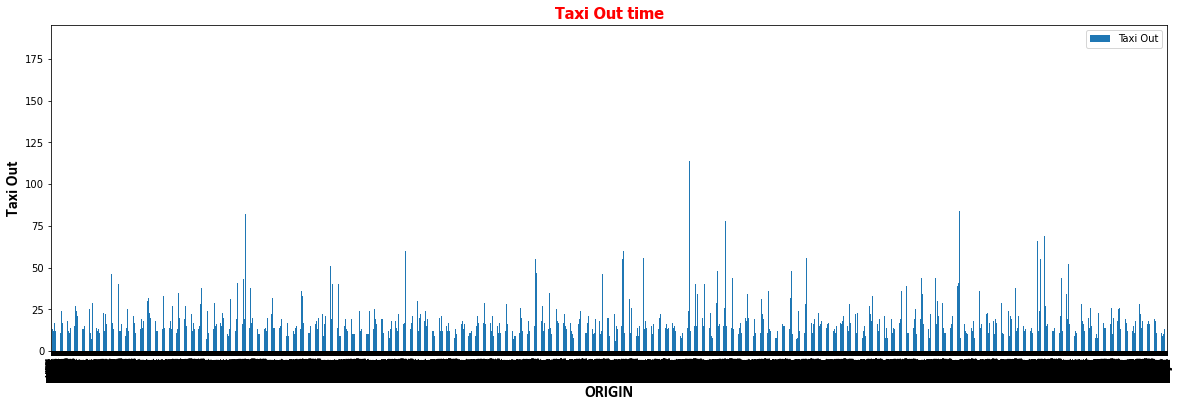

In [27]:
# Build Bar chart for Factors affect for flight delays (ORIGIN vs Taxi Out)

factors_affect = delay_flight.plot.bar(x='ORIGIN', y='Taxi Out', rot=0, figsize=(20, 6))
plt.title("Taxi Out time", fontdict={'family': 'Tahoma', 'color': 'red', 'weight': 'bold', 'size': 16})
plt.xlabel("ORIGIN",fontdict={'family': 'Calibri', 'color': 'black', 'weight': 'bold', 'size': 16})
plt.xticks(rotation=90)
plt.ylabel("Taxi Out",fontdict={'family': 'Calibri', 'color': 'black', 'weight': 'bold', 'size': 16})
plt.show(factors_affect)

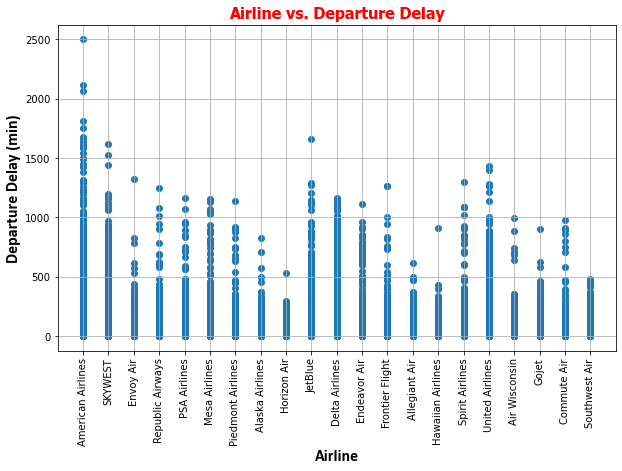

In [28]:
# Build scatter plot for Airline vs. Departure Delay

x_values = delay_flight['Airline']
y_values = delay_flight['Departure Delay']

# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(x_values,y_values)
title_font = {'family': 'Tahoma', 'color': 'red', 'weight': 'bold', 'size': 16}
plt.title('Airline vs. Departure Delay', fontdict=title_font)
plt.xlabel("Airline", fontdict={'family': 'Calibri', 'color': 'black', 'weight': 'bold', 'size': 16})
plt.ylabel("Departure Delay (min)", fontdict={'family': 'Calibri', 'color': 'black', 'weight': 'bold', 'size': 16})
plt.xticks(rotation=90)
plt.grid(True)


# Show plot
plt.show() 

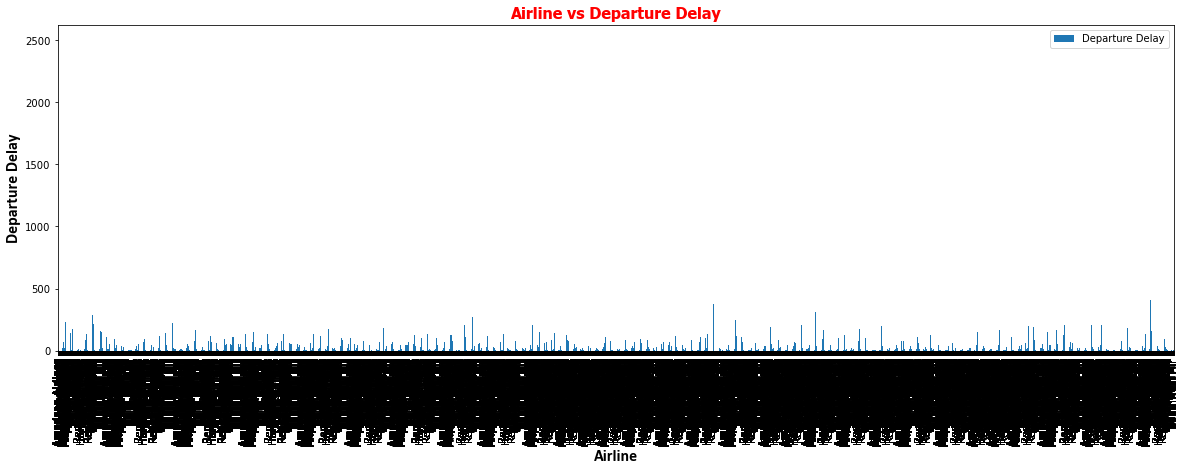

In [29]:
# Build Bar chart for Airline vs Departure Delay

departure_delay = delay_flight.plot.bar(x='Airline', y='Departure Delay', rot=0, figsize=(20, 6))
plt.title("Airline vs Departure Delay", fontdict={'family': 'Tahoma', 'color': 'red', 'weight': 'bold', 'size': 16})
plt.xlabel("Airline",fontdict={'family': 'Calibri', 'color': 'black', 'weight': 'bold', 'size': 16})
plt.xticks(rotation=90)
plt.ylabel("Departure Delay",fontdict={'family': 'Calibri', 'color': 'black', 'weight': 'bold', 'size': 16})
plt.show(departure_delay )

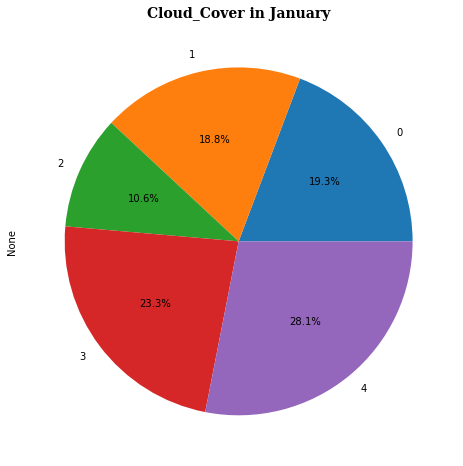

In [30]:
#Build Pie chart for Cloud_Cover in January

# Group data by a specific column
cloud_cover = delay_flight.groupby('Cloud Cover').size()
#table = pd.DataFrame({'count' : cloud_cover})
# Create a pie chart from the grouped data
cloud_cover.plot(kind='pie', y= "cloud cover", figsize=(8, 8), autopct='%1.1f%%')

# Add a title
plt.title("Cloud_Cover in January", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})

plt.show()
#print(table)

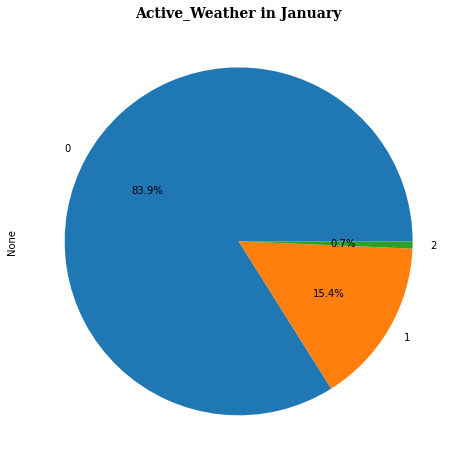

In [31]:
#Build Pie chart for Active_Weather in January

# Group data by a specific column
Active_Weather = delay_flight.groupby('Active Weather').size()
#table = pd.DataFrame({'count' : Active_Weather})
# Create a pie chart from the grouped data
Active_Weather.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')

# Add a title
plt.title("Active_Weather in January", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})

plt.show()
#print(table)

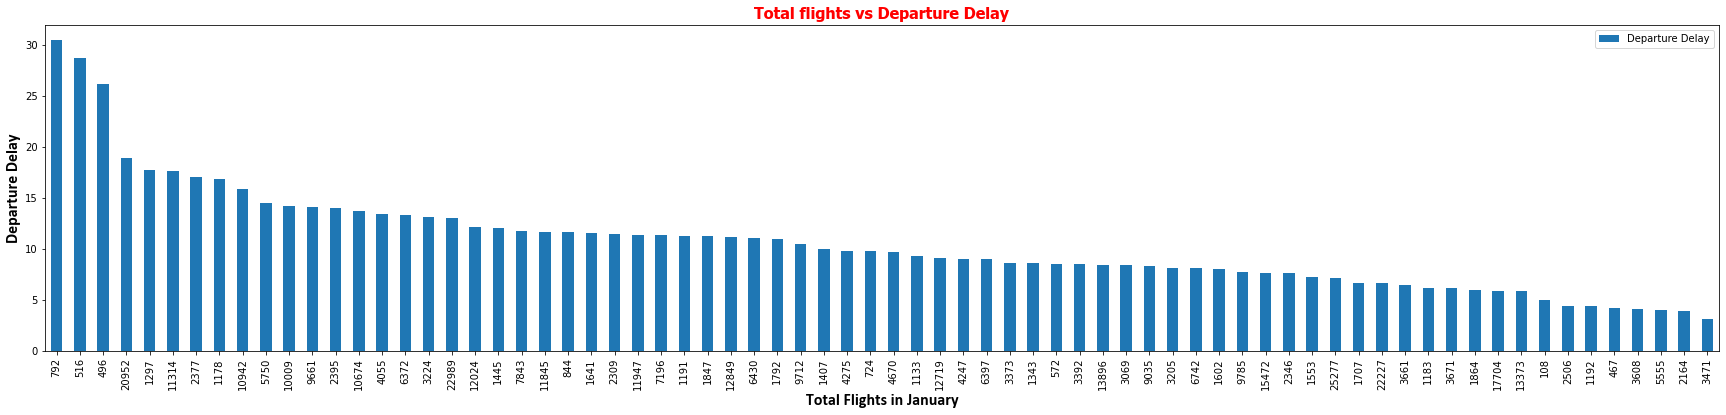

In [32]:
# Build Bar chart for Total flights vs Departure Delay

Total_flight = origin_delays.plot.bar(x='Total Flights in January', y=['Departure Delay'], rot=0, figsize=(30, 6))		
plt.title("Total flights vs Departure Delay", fontdict={'family': 'Tahoma', 'color': 'red', 'weight': 'bold', 'size': 16})
plt.xlabel("Total Flights in January",fontdict={'family': 'Calibri', 'color': 'black', 'weight': 'bold', 'size': 16})
plt.xticks(rotation=90)
plt.ylabel("Departure Delay",fontdict={'family': 'Calibri', 'color': 'black', 'weight': 'bold', 'size': 16})
plt.show(Total_flight)



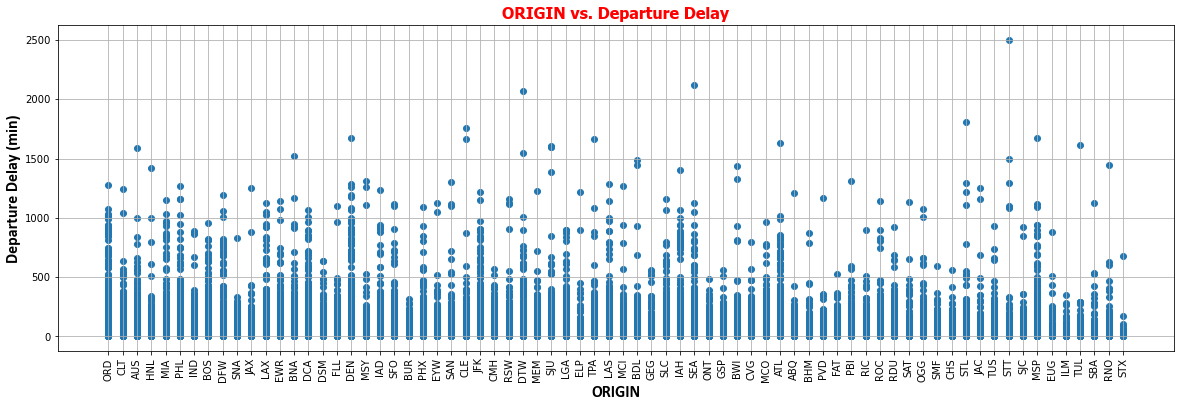

In [33]:
# Build scatter plot for ORIGIN vs. Departure Delay

x_values = delay_flight['ORIGIN']
y_values = delay_flight['Departure Delay']

# Incorporate the other graph properties
plt.figure(figsize=(20, 6))
plt.scatter(x_values,y_values)
title_font = {'family': 'Tahoma', 'color': 'red', 'weight': 'bold', 'size': 16}
plt.title('ORIGIN vs. Departure Delay', fontdict=title_font)
plt.xlabel("ORIGIN", fontdict={'family': 'Calibri', 'color': 'black', 'weight': 'bold', 'size': 16})
plt.ylabel("Departure Delay (min)", fontdict={'family': 'Calibri', 'color': 'black', 'weight': 'bold', 'size': 16})
plt.xticks(rotation=90)
plt.grid(True)


# Show plot
plt.show() 

c:\Users\Pinal\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Number of Delays')

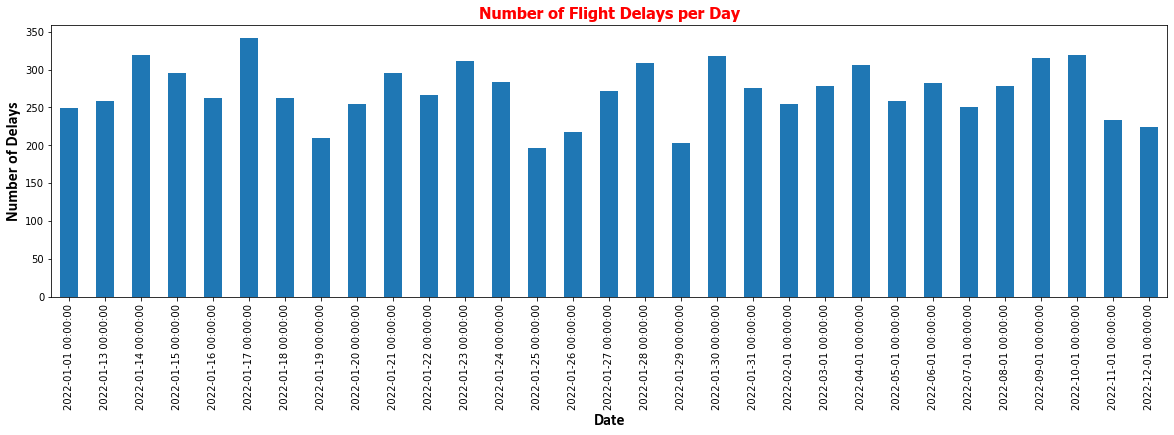

In [34]:
# Count Number of Flight delay per day

# Convert the 'Flight Dates' column to a datetime object
delay_flight['Flight Date'] = pd.to_datetime(delay_flight['Flight Date'])

# Group the data by date and count the number of delays per day
delays_per_day = delay_flight[delay_flight['Departure Delay'] == True].groupby('Flight Date').size()

# Plot the number of delays per day as a bar chart
ax = delays_per_day.plot(kind='bar', figsize=(20, 5))

# Set the title and axis labels
ax.set_title('Number of Flight Delays per Day', fontdict={'family': 'Tahoma', 'color': 'red', 'weight': 'bold', 'size': 16})
plt.xticks(rotation=90)
ax.set_xlabel('Date',fontdict={'family': 'Calibri', 'color': 'black', 'weight': 'bold', 'size': 16})
ax.set_ylabel('Number of Delays',fontdict={'family': 'Calibri', 'color': 'black', 'weight': 'bold', 'size': 16})


With our dataframe built, we can run describe() to get a general desrciption of our columns.

In [35]:
origin_delays.describe()

,Air Time,Distance,Departure Delay,Cloud Cover,Total Flights in January,Flights per Day,No Active Weather,Moderate Weather,Severe Weather,Total Taxi Out Time,Taxi Time Per Flight
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,108.746662,807.424977,10.612840,1.983762,6063.930556,195.610663,5262.402778,776.125000,25.402778,103992.625000,15.879680
std,28.769751,251.606959,5.228199,0.611168,5999.190916,193.522288,5323.012492,1046.285205,58.126782,112794.528466,3.021507
min,63.029979,385.706638,3.168251,0.330490,108.000000,3.483871,103.000000,0.000000,0.000000,1405.000000,11.295366
25%,90.989200,641.094019,7.492193,1.616067,1589.750000,51.282258,1512.250000,126.250000,0.000000,24210.250000,13.501429
50%,102.107903,750.153824,9.745825,2.063249,3539.500000,114.177419,3075.000000,368.000000,6.000000,54022.000000,15.159447
75%,122.183574,947.602315,12.359226,2.426629,9730.250000,313.879032,7419.250000,975.250000,21.000000,173819.750000,17.855430
max,188.898191,1574.472932,30.441919,3.296068,25277.000000,815.387097,22349.000000,5886.000000,381.000000,497040.000000,23.536822


Now we can run our tests. We first run a Multi-Linear regression so we can figure out which column is most influential in causing departure delays and after that, we can verify that it affects the dependent variable by running a t test and confirming it against the Null Hypothesis of zero affect.

# Multi-Linear Regression

In [36]:
X = origin_delays[['Air Time', 'Distance', 'Cloud Cover','No Active Weather', 'Moderate Weather',
                   'Severe Weather', 'Flights per Day', 'Taxi Time Per Flight']]
y = origin_delays['Departure Delay']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[ 1.03668533e-01 -4.68515717e-03 -9.73619886e-01 -3.33667084e-04
 -5.87267110e-04  2.17620457e-02  6.72293921e-04  1.03011741e+00]


A Multi-Linear works by building out an equation for a line, much like the single linear regression but it uses multiple slopes to find the variable that impacts the y variable (Departure Delays in this case) the most. In our case, each variable seems to impact Departure Delays only a slight amount so that would lead us to think that the main cause of flight delays are something else entirely outside of our dataset. But in this case, the Taxi Time Per Flight seems to be the main cause. So we can take Taxi Flight Time and use it in our hypotheisis.

# Null Hypothesis
Taxi Flight Times have no affect on Flight Delays

# t-Test

In [37]:
#group1 = origin_delays[origin_delays['Departure Delay']]
#group2 = origin_delays[origin_delays['Taxi Time Per Flight']]
stats.ttest_ind(origin_delays['Taxi Time Per Flight'], origin_delays['Departure Delay'],equal_var = False)

Ttest_indResult(statistic=7.400937226766764, pvalue=2.5218024808967977e-11)

# Conclusion
With a p-value of less than .05, we fail to reject the null hypothesis, meaning that Taxi Time Per Flight has an affect on Departure Delays.